# SUPERVISED LEARNING: CLASSIFICATION

# KNN

In [1]:
import pandas as pd

df = pd.read_csv("dataset_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X, y)

In [5]:
random_user = X.sample(1, random_state=45)

knn_model.predict(random_user)

array([1], dtype=int64)

In [6]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = knn_model.predict(X)

# AUC için y_prob:
y_prob = knn_model.predict_proba(X)[:, 1]

print(classification_report(y, y_pred))
print(roc_auc_score(y, y_prob))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.79      0.70      0.74       268

    accuracy                           0.83       768
   macro avg       0.82      0.80      0.81       768
weighted avg       0.83      0.83      0.83       768

0.9017686567164179


In [7]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

print(cv_results['test_accuracy'].mean())
print(cv_results['test_f1'].mean()) 
print(cv_results['test_roc_auc'].mean())

0.733112638994992
0.5905780011534191
0.7805279524807827


In [8]:
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
knn_model.get_params()

knn_params = {"n_neighbors": range(2, 50)}

knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1).fit(X, y)

knn_gs_best.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'n_neighbors': 17}

In [9]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y)

cv_results = cross_validate(knn_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

print(cv_results['test_accuracy'].mean())
print(cv_results['test_f1'].mean()) 
print(cv_results['test_roc_auc'].mean())

0.7669892199303965
0.6170909049720137
0.8127938504542278


In [10]:
random_user = X.sample(1)

knn_final.predict(random_user)

array([1], dtype=int64)

# MULTI LABEL KNN

In [11]:
import pandas as pd

df = pd.read_excel("T-shirt.xlsx")
df

,Unnamed: 0,Boy,Kilo,Beden
0,0,149,51,S
1,1,151,50,S
2,2,145,57,S
3,3,148,54,S
4,4,149,55,S
...,...,...,...,...
152,152,172,88,L
153,153,166,75,L
154,154,167,76,L
155,155,183,69,L


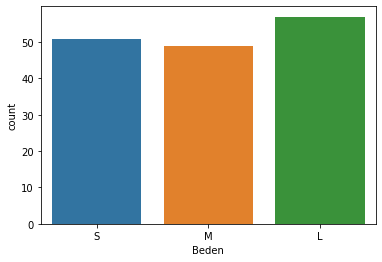

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


sns.countplot(df["Beden"])
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Beden"] = le.fit_transform(df["Beden"])

print(le.classes_)

['L' 'M' 'S']


In [14]:
X = df[["Boy", "Kilo"]]
y = df["Beden"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": range(2, 50)}

knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1).fit(X, y)

print(knn_gs_best.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'n_neighbors': 41}


In [16]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X_train, y_train)

y_pred = knn_final.predict(X_test)

ConfusionMatrix(ax=<AxesSubplot:>, classes=['S', 'M', 'L'],
                cmap=<matplotlib.colors.ListedColormap object at 0x000001BB000A18B0>,
                estimator=KNeighborsClassifier(n_neighbors=41))
0.875


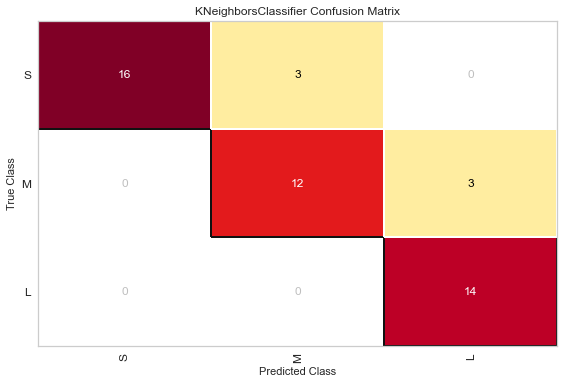

AxesSubplot(0.0763194,0.11101;0.901181x0.820791)


In [17]:
from yellowbrick.classifier import ConfusionMatrix

kategori = ["S", "M", "L"]
cm = ConfusionMatrix(knn_final)
cm = ConfusionMatrix(knn_final, classes = kategori, label_encoder = {2:"S", 1:"M", 0:"L"})
print(cm.fit(X_train, y_train))
print(cm.score(X_test, y_test))
print(cm.poof())

In [18]:
from sklearn.metrics import accuracy_score

print("Doğruluk(Accuracy): %f" %accuracy_score(y_test,y_pred))

Doğruluk(Accuracy): 0.875000


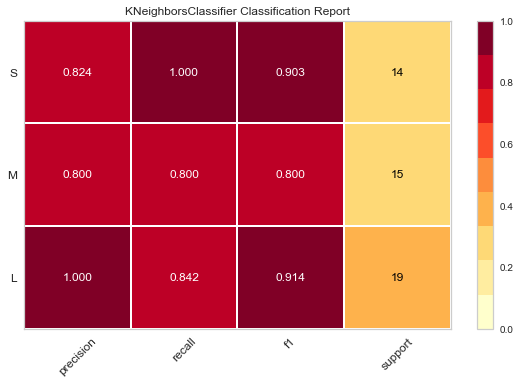

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [19]:
from yellowbrick.classifier import ClassificationReport

cr = ClassificationReport(knn_final, classes = ["L", "M", "S"], support=True)
cr.fit(X_train, y_train)
cr.score(X_test, y_test)
cr.poof()

# LOGISTIC REGRESSION

In [20]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [23]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(X, y)
log_model.intercept_
log_model.coef_

LogisticRegression(solver='liblinear')

In [ ]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y, y_pred)

In [ ]:
print(classification_report(y, y_pred))

In [ ]:
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

In [ ]:
######################################################
# Model Validation: Holdout
######################################################
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=17)

log_model = LogisticRegression().fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))


plot_roc_curve(log_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# AUC
roc_auc_score(y_test, y_prob)

In [ ]:
######################################################
# Model Validation: 10-Fold Cross Validation
######################################################

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

log_model = LogisticRegression().fit(X, y)

cv_results = cross_validate(log_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])





cv_results['test_accuracy'].mean()


cv_results['test_precision'].mean()


cv_results['test_recall'].mean()


cv_results['test_f1'].mean()


cv_results['test_roc_auc'].mean()



# NAIVE BAYES

In [24]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [26]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [27]:
y_pred = nb_model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7445887445887446

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

## Support Vector Machine

In [30]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [32]:
from sklearn.svm import SVC

svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [33]:
y_pred = svc_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7359307359307359

In [34]:
svc_params = {"C": [0.0001, 0.001, 0.1],
             "gamma": [0.0001, 0.001, 0.1]}

In [35]:
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel = "linear")
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         verbose = 1)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END ..............................C=0.0001, gamma=0.001; total time=   0.0s
[CV] END ..............................C=0.0001,

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.1],
                         'gamma': [0.0001, 0.001, 0.1]},
             verbose=2)

In [36]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 0.001, 'gamma': 0.0001}


In [37]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [38]:
y_pred = svc_tuned.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7359307359307359

## CART (Classification and Regression Trees)

In [39]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)


In [40]:
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [41]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [42]:
from skompiler import skompile

print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[2] <= 65.0 else 0) if
    x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 1 if x[7] <= 26.5 else 0) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 1 if 
    x[1] <= 138.0 else 0) if x[5] <= 30.300000190734863 else 1 if x[5] <= 
    32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[0] <= 0.5 else
    1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else 1) if x[7] <=
    28.5 else (1 if x[7] <= 29.5 else (0 if x[1] <= 133.0 else (1 if x[4] <=
    30.0 else 0) if x[1] <= 135.0 else 0) if x[2] <= 94.0 else 1 if x[0] <=
    9.0 else 0) if x[5] <= 26.949999809265137 else (1 if x[1] <= 28.5 else 
    0 if x[0] <=

In [43]:
y_pred = cart_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7229437229437229

In [44]:
cart_grid = {"max_depth": range(1,5),
            "min_samples_split":list(range(2,50))}

In [45]:
cart = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [46]:
print("en iyi parametreler:" + str(cart_cv_model.best_params_))

en iyi parametreler:{'max_depth': 4, 'min_samples_split': 19}


In [47]:
cart_final = DecisionTreeClassifier(max_depth = 4, min_samples_split = 20)
cart_tuned = cart_final.fit(X_train, y_train)

In [48]:
y_pred_final = cart_tuned.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_final)

0.70995670995671

## RANDOM FORESTS CLASSIFICATION

In [49]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)


In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)

In [51]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [52]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [53]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [54]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [55]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 500}


In [56]:
rf_final = RandomForestClassifier(max_depth = 10, 
                                  max_features = 5, 
                                  min_samples_split = 5,
                                  n_estimators = 500)

rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=5,
                       n_estimators=500)

In [57]:
y_pred_final = rf_final.predict(X_test)
accuracy_score(y_test, y_pred_final)

0.7489177489177489

In [59]:
Importance = pd.DataFrame({"Importance": rf_final.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

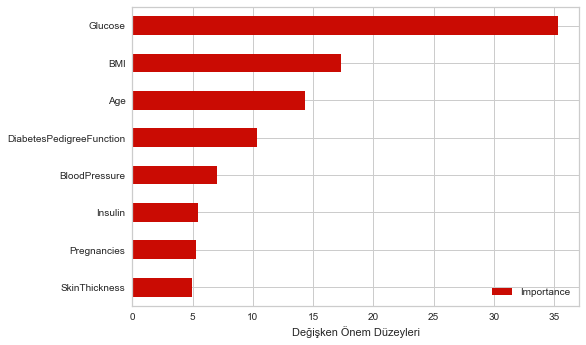

In [60]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri");

## GBM (Gradient Boosting Machine)

In [ ]:
df = pd.read_csv("dataset_diabetes.csv")

y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [ ]:
gbm = GradientBoostingClassifier(random_state=42)

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
gbm_cv.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

In [ ]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [ ]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
gbm_model = GradientBoostingClassifier(random_state=42)

gbm_model.get_params()

cv_results = cross_validate(gbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()
# 0.7591715474068416
cv_results['test_f1'].mean()
# 0.634
cv_results['test_roc_auc'].mean()
# 0.82548


gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

gbm_best_grid.best_params_

gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17, ).fit(X, y)


cv_results = cross_validate(gbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()


# XGBOOST

In [ ]:
df = pd.read_csv("dataset_diabetes.csv")

y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, verbose = 1)

In [ ]:
xgb_cv_model.fit(X_train, y_train)

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [ ]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
xgboost_model = XGBClassifier(random_state=17, use_label_encoder=False)
xgboost_model.get_params()
cv_results = cross_validate(xgboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()
# 0.75265
cv_results['test_f1'].mean()
# 0.631
cv_results['test_roc_auc'].mean()
# 0.7987

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.7, 1]}

xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(xgboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()

# LightGBM

In [ ]:
lgbm_model = LGBMClassifier(random_state=17)
lgbm_model.get_params()

cv_results = cross_validate(lgbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()

lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()

# Hiperparametre yeni değerlerle
lgbm_params = {"learning_rate": [0.01, 0.02, 0.05, 0.1],
               "n_estimators": [200, 300, 350, 400],
               "colsample_bytree": [0.9, 0.8, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()

In [ ]:
lgbm_model = LGBMClassifier(random_state=17, colsample_bytree=0.9, learning_rate=0.01)

lgbm_params = {"n_estimators": [200, 400, 1000, 5000, 8000, 9000, 10000]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()

In [ ]:
df = pd.read_csv("dataset_diabetes.csv")

y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             verbose = 1)

lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# CatBOOST

In [ ]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

cv_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()


catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}


catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()


In [ ]:
df = pd.read_csv("dataset_diabetes.csv")

y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [ ]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

In [ ]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)
plot_importance(gbm_final, X)
plot_importance(xgboost_final, X)
plot_importance(lgbm_final, X)
plot_importance(catboost_final, X)


################################
# Hyperparameter Optimization with RandomSearchCV (BONUS)
################################

rf_model = RandomForestClassifier(random_state=17)

rf_random_params = {"max_depth": np.random.randint(5, 50, 10),
                    "max_features": [3, 5, 7, "auto", "sqrt"],
                    "min_samples_split": np.random.randint(2, 50, 20),
                    "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_random_params,
                               n_iter=100,  # denenecek parametre sayısı
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)

rf_random.fit(X, y)


rf_random.best_params_


rf_random_final = rf_model.set_params(**rf_random.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(rf_random_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()


################################
# Analyzing Model Complexity with Learning Curves (BONUS)
################################

def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)


rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "auto"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]


rf_model = RandomForestClassifier(random_state=17)

for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1])

rf_val_params[0][1]



# SINIFLANDIRMA MODELLERİNDE PERFORMANS DEĞERLENDİRME

## CONFUSION MATRIX

# ROC (Receiver Operating Charasteristics) Eğrisi ve AUC(Area Under The Curve) Alanı